In [2]:
# Please change the following to your own PAPER api key and secret
# or set them as environment variables (ALPACA_API_KEY, ALPACA_SECRET_KEY).
# You can get them from https://alpaca.markets/
import nest_asyncio
nest_asyncio.apply()
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

from alpaca.trading.client import TradingClient
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from alpaca.data.historical.corporate_actions import CorporateActionsClient
from alpaca.data.historical.stock import StockHistoricalDataClient
from alpaca.trading.stream import TradingStream
from alpaca.data.live.stock import StockDataStream

from alpaca.data.requests import (
    CorporateActionsRequest,
    StockBarsRequest,
    StockQuotesRequest,
    StockTradesRequest,
)
from alpaca.trading.requests import (
    ClosePositionRequest,
    GetAssetsRequest,
    GetOrdersRequest,
    LimitOrderRequest,
    MarketOrderRequest,
    StopLimitOrderRequest,
    StopLossRequest,
    StopOrderRequest,
    TakeProfitRequest,
    TrailingStopOrderRequest,
)
from alpaca.trading.enums import (
    AssetExchange,
    AssetStatus,
    OrderClass,
    OrderSide,
    OrderType,
    QueryOrderStatus,
    TimeInForce,
)
api_key = "PKRE7IFNQRQFUHD5MC4OK4KYVH"
secret_key = "2uV4xbvVeuMEsZySmqys3L4hgSpEx2fv4WH6DfnDeqM7"

#### We use paper environment for this example ####
paper = True # Please do not modify this. This example is for paper trading only.
####

# Below are the variables for development this documents
# Please do not change these variables
trade_api_url = "https://paper-api.alpaca.markets/v2"
trade_api_wss = "wss://paper-api.alpaca.markets/stream"
data_api_url = "https://data.alpaca.markets/v2"
stream_data_wss = "wss://stream.data.alpaca.markets/v2/sip"
# If you want to use live trading, please change the variables below
trade_client = TradingClient(api_key=api_key, secret_key=secret_key, paper=paper)
acct = trade_client.get_account()
acct_config = trade_client.get_account_configurations()


In [12]:
from alpaca.trading.enums import AssetClass

req = GetAssetsRequest(
  asset_class=AssetClass.US_EQUITY,  # default asset_class is us_equity
  status=AssetStatus.ACTIVE,
  exchange=AssetExchange.NASDAQ,
)

assets = trade_client.get_all_assets(req)
for asset in assets:
    print(asset)

id=UUID('0025eb76-4b4c-48c0-a0b4-fb8669c24f3c') asset_class=<AssetClass.US_EQUITY: 'us_equity'> exchange=<AssetExchange.NASDAQ: 'NASDAQ'> symbol='PAVS' name='Paranovus Entertainment Technology Ltd. Class A Ordinary Shares' status=<AssetStatus.ACTIVE: 'active'> tradable=False marginable=False shortable=False easy_to_borrow=False fractionable=False min_order_size=None min_trade_increment=None price_increment=None maintenance_margin_requirement=100.0 attributes=[]
id=UUID('eef4a493-a14f-4294-bd97-697e61bf5ab9') asset_class=<AssetClass.US_EQUITY: 'us_equity'> exchange=<AssetExchange.NASDAQ: 'NASDAQ'> symbol='SPGC' name='Sacks Parente Golf, Inc. Common Stock' status=<AssetStatus.ACTIVE: 'active'> tradable=False marginable=False shortable=False easy_to_borrow=False fractionable=False min_order_size=None min_trade_increment=None price_increment=None maintenance_margin_requirement=100.0 attributes=[]
id=UUID('2c93ee4b-2f14-44c8-88f6-6d5de316eb24') asset_class=<AssetClass.US_EQUITY: 'us_equity'

In [13]:
# Get account information
print(f'buyingpower:{acct.buying_power}')
print(f'cash:{acct.cash}')
print(f'portfolio value:{acct.portfolio_value}')
print(f'last equity:{acct.last_equity}')
# Get all orders

buyingpower:87726.08
cash:-185356.78
portfolio value:171509.22
last equity:185578.22


In [14]:
positions = trade_client.get_all_positions()
for position in positions:
    
    print(f'{position.symbol} - qty:{position.qty}, side:{position.side}, market value:{position.market_value} price:{position.current_price} cost basis:{position.cost_basis} unrealized pl:{position.unrealized_pl}, unrealized pl pct:{position.unrealized_plpc}')
    
    

AIRS - qty:1000, side:PositionSide.LONG, market value:6120 price:6.12 cost basis:11740 unrealized pl:-5620, unrealized pl pct:-0.4787052810902896
BBAI260320C00007000 - qty:100, side:PositionSide.LONG, market value:11000 price:1.1 cost basis:11600 unrealized pl:-600, unrealized pl pct:-0.0517241379310345
BBAI260320C00008000 - qty:-100, side:PositionSide.SHORT, market value:-9500 price:0.95 cost basis:-9100 unrealized pl:-400, unrealized pl pct:-0.043956043956044
CLIK - qty:100, side:PositionSide.LONG, market value:691 price:6.91 cost basis:1018 unrealized pl:-327, unrealized pl pct:-0.3212180746561886
CRM251219P00175000 - qty:1, side:PositionSide.LONG, market value:32 price:0.32 cost basis:193 unrealized pl:-161, unrealized pl pct:-0.8341968911917098
CRM251219P00180000 - qty:2, side:PositionSide.LONG, market value:16 price:0.08 cost basis:506 unrealized pl:-490, unrealized pl pct:-0.9683794466403162
CRM251219P00190000 - qty:-1, side:PositionSide.SHORT, market value:-153 price:1.53 cost 

In [15]:
symbol = "AAPL"
req = MarketOrderRequest(
    symbol = symbol,
    qty = 5.5,
    side = OrderSide.BUY,
    type = OrderType.MARKET,
    time_in_force = TimeInForce.DAY,
)
res = trade_client.submit_order(req)

In [1]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
stock_historical_data_client = StockHistoricalDataClient(api_key, secret_key)
# get historical bars by symbol
# ref. https://docs.alpaca.markets/reference/stockbars-1
now = datetime.now(ZoneInfo("America/New_York"))
req = StockBarsRequest(
    symbol_or_symbols = [symbol],
    timeframe=TimeFrame(amount = 1, unit = TimeFrameUnit.Hour), # specify timeframe
    start = now - timedelta(days = 200),                          # specify start datetime, default=the beginning of the current day.
    # end_date=None,                                        # specify end datetime, default=now                                            # specify limit
)
df=stock_historical_data_client.get_stock_bars(req).df
df.reset_index(inplace=True)
df.set_index('timestamp',inplace=True)
df = dropna(df)

# Add ta features filling NaN values
df = add_all_ta_features(
    df, open="open", high="high", low="low", close="close", volume="volume", fillna=True)
df=df[-50:]  # keep the last 50 rows only
# df.columns


NameError: name 'StockHistoricalDataClient' is not defined

In [96]:
df.columns


Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'trade_count',
       'vwap', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ich

In [136]:
rsi=df['momentum_rsi']
# MACD (12, 26, 9)
ema12 = df.trend_ema_fast
ema26 = df.trend_ema_slow
macd = df['trend_macd']
signal = df['trend_macd_signal']
hist = macd - signal
# macd=df['momentum_macd']
obv=df['volume_obv']


In [173]:
# === Build addplots ===
macd_min = min(macd.min(), signal.min(), hist.min())
macd_max = max(macd.max(), signal.max(), hist.max())
macd_range = max(abs(macd_min), abs(macd_max))
apds = [
    mpf.make_addplot(df['volume'], type='bar', panel=1, color='gray', alpha=0.4, ylabel='Vol'),
    mpf.make_addplot(rsi, panel=2, color='g', ylabel='RSI', ylim=(0,100)),
    mpf.make_addplot(pd.Series(30, index=rsi.index), panel=2, color='0.5', width=0.5),
    mpf.make_addplot(pd.Series(70, index=rsi.index), panel=2, color='0.5', width=0.5),

    # MACD panel (macd, signal, histogram)
    mpf.make_addplot(macd, panel=3, color='b', width=0.8, ylim=(-1, 1), ylabel='MACD'),
    mpf.make_addplot(signal, panel=3, color='r', width=0.8, ylim=(-1, 1)),
    mpf.make_addplot(hist, panel=3, ylim=(-1,1),type='bar'),

    # OBV panel
    mpf.make_addplot(obv, panel=4, color='purple', ylabel='OBV'),
]
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    title=f'{symbol} Price Chart with RSI, MACD, OBV',
    addplot=apds,
    volume=False,                # ⬅️ IMPORTANT: disable auto-volume
    panel_ratios=(3,1,1,1,1),    # main, vol, rsi, macd, obv
    figratio=(16,10),
    figscale=1.5,
    panel_spacing=0.12   # <<< space between panels
)

KeyError: 'Unrecognized kwarg="panel_spacing"'

In [17]:

symbol = "TNXP"
corporate_actions_client = CorporateActionsClient(api_key, secret_key)
corporate_actions_client.get_corporate_actions(CorporateActionsRequest(
    start=datetime(2020, 1, 1),
    symbols=[symbol]
)).df



,symbol,new_rate,old_rate,process_date,ex_date,record_date,payable_date
corporate_action_type,,,,,,,
reverse_splits,TNXP,1.0,32.00,2022-05-17,2022-05-17,2022-05-17,2022-05-17
reverse_splits,TNXP,1.0,6.25,2023-05-10,2023-05-10,2023-05-10,2023-05-10
reverse_splits,TNXP,1.0,32.00,2024-06-10,2024-06-10,2024-06-10,2024-06-10
reverse_splits,TNXP,1.0,100.00,2025-02-05,2025-02-05,2025-02-05,2025-02-05


In [180]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [185]:
import mplfinance as mpf
days=60

apds = [
    mpf.make_addplot(rsi, panel=2, color='g', ylabel='RSI', ylim=(0,100),width=0.8),
    # mpf.make_addplot(rsi,index=rsi.index, panel=1, color='g', width=0.7),
    # mpf.make_addplot(pd.Series(30, index=rsi.index), panel=1, color='0.5', width=0.5),
    # mpf.make_addplot(pd.Series(70, index=rsi.index), panel=1, color='0.5', width=0.5),

    # MACD panel (macd, signal, histogram)
    mpf.make_addplot(macd, panel=4, color='b', ylabel='MACD',ylim=(-1,1), width=0.8),
    mpf.make_addplot(signal, panel=4, color='r', width=0.8),
    mpf.make_addplot(hist, type='bar', panel=4,alpha=0.4),

    # OBV panel
    mpf.make_addplot(obv, panel=6, color='purple', ylabel='OBV',width=1),
    mpf.make_addplot(df['volume'],panel=7, type='bar', color='dimgray', ylabel='Volume'),
]
# === Plot ===
mpf.plot(
    df,
    type='candle',
    volume=True,
    style='yahoo',
    title=f'{symbol} — Price, Volume, RSI, MACD, OBV',
    # mav=(3,6,9),
    addplot=apds,
panel_ratios = (3,   # price
                0.15,# spacer
                1,   # volume
                0.15,# spacer
                1,   # rsi
                0.15,# spacer
                1,   # macd
                0.15,# spacer
                1),  # obv
    figratio=(16,10),
    figscale=1.6
)

ValueError: inferred panel list is missing panels: [3, 5]

<Figure size 1472x920 with 0 Axes>

<Axes: xlabel='timestamp'>

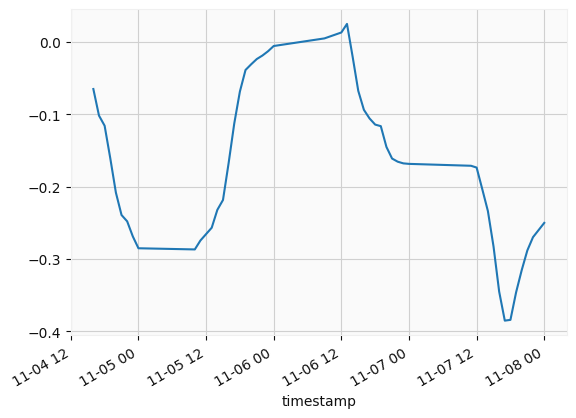

In [151]:
macd.plot()
